# NLP Experiment 2 - Tensorflow
Experiment with Tensorflow basic operations 
follow along [FreeCodeCamp's Course](https://www.youtube.com/watch?v=tPYj3fFJGjk)

## Module 1 - Introduction

### Install TF
for local environment, we need to run


```
!pip install --upgrade tensorflow
```

for colab 
```
%tensorflow_version 2.x
```


In [18]:
#@title Select environment
environment = "collab" #@param ["collab", "local"]



In [19]:
if environment == 'collab':
  %tensorflow_version 2.x
elif environment == 'local':
  !pip install --upgrade tensorflow 
  

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Now we import tensorflow as tf and check version

In [20]:
import tensorflow as tf 
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.8/dist-packages/tensorflow/_api/v2/version/__init__.py'>


### Create Tensors 
create three tensors of three datatypes 
* string 
* number 
* float 

In [21]:
str_tensor = tf.Variable("string tensor", tf.string)
num_tensor = tf.Variable(42, tf.int16)
float_tensor = tf.Variable(3.14159, tf.float64)

### Rank/Degree
check rank/degree of tensors

In [22]:
rank1_tensor = tf.Variable(["The", "quick", "brown", "fox"], tf.string)
rank2_tensor = tf.Variable([["this", "is", "a", "sentence"],["the", "other", "sentence", "follows"]], tf.string)

let us check its ranks

In [23]:
ranks_vec = []
ranks_vec.append(tf.rank(str_tensor))
ranks_vec.append(tf.rank(rank1_tensor))
ranks_vec.append(tf.rank(rank2_tensor))

# print 
ranks_vec

[<tf.Tensor: shape=(), dtype=int32, numpy=0>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>]

check shapes

In [25]:
tensor1 = tf.ones([1,2,3])
print(tensor1)
tensor2 = tf.reshape(tensor1, [2,3,1])
tensor3 = tf.reshape(tensor2, [3, -1])

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)


In [26]:
print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


### Toy example

In [34]:
t = tf.zeros([5,5,5,5])
print(t)
t = tf.reshape(t, [25, -1])
print(t)

tf.Tensor(
[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0.

## Module 3 - Learning Algo
* [ ] Linear Regression 
* [ ] Classification 
* [ ] Clustering 
* [ ] HMM


### Linear Regression

(0.0, 6.0, 0.0, 20.0)

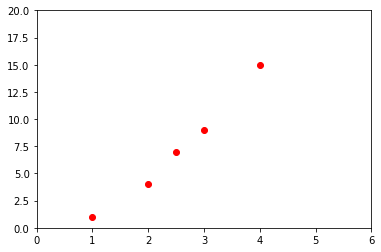

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]

plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

Install sklearn

In [36]:
!pip install -q sklearn

In [37]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc 


Load dataset 

In [41]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
print(dftrain.head())
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(dftrain.head())

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0     

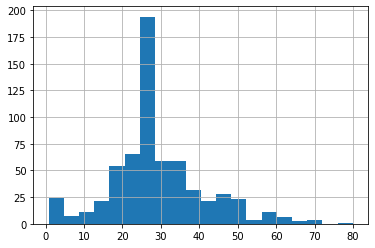

In [44]:
dftrain.age.hist(bins=20)

In [45]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']


#### Define Features 
using TF, create features 

In [46]:
from tensorflow.python.feature_column import feature_column
feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique() # gets a list of all unique values from a column 
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

#### Training Process

##### Input Function
Define input function 

In [55]:
# input function factory 
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  """Make input function and return"""
  # function to be returned
  def input_function():
    # create tf.data.Dataset object 
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))

    # if shuffle set to true, shuffle data
    if shuffle:
      ds = ds.shuffle(1000) # not sure what this 1000, is it a seed?
    
    # split data into batches and repeat into epochs
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # return dataset 
    return ds 

  # return input function 
  return input_function 

Prepare input functions for training and evaluation 

In [56]:
train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

##### Create Model

In [59]:
# linear estimator 
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)


##### Train the Model

In [67]:
linear_est.train(train_input_fn)

Instructions for updating:
Use standard file utilities to get mtimes.


##### Evaluate the Model

In [68]:
result = linear_est.evaluate(eval_input_fn)

#### Result

In [69]:
clear_output()
print(result['accuracy'])
print(result)

0.75
{'accuracy': 0.75, 'accuracy_baseline': 0.625, 'auc': 0.8357515, 'auc_precision_recall': 0.7939313, 'average_loss': 0.48300517, 'label/mean': 0.375, 'loss': 0.4730098, 'precision': 0.6486486, 'prediction/mean': 0.4303407, 'recall': 0.72727275, 'global_step': 400}


##### Show Results 

In [80]:
result = list(linear_est.predict(eval_input_fn))

# match prbability with actual y 
for idx in range(len(y_eval)):
  print("pax ["+ str(idx) + "] actual "+str(y_eval.loc[idx])+ " pct survival "+ str(result[idx]['probabilities'][1]))

pax [0] actual 0 pct survival 0.08736905
pax [1] actual 0 pct survival 0.5446306
pax [2] actual 1 pct survival 0.81339675
pax [3] actual 1 pct survival 0.71645254
pax [4] actual 1 pct survival 0.31155202
pax [5] actual 1 pct survival 0.80151063
pax [6] actual 0 pct survival 0.55465996
pax [7] actual 0 pct survival 0.12336704
pax [8] actual 0 pct survival 0.68203026
pax [9] actual 1 pct survival 0.7831805
pax [10] actual 1 pct survival 0.7379673
pax [11] actual 0 pct survival 0.12311683
pax [12] actual 1 pct survival 0.90151924
pax [13] actual 0 pct survival 0.5053334
pax [14] actual 1 pct survival 0.8874138
pax [15] actual 0 pct survival 0.600207
pax [16] actual 0 pct survival 0.1912725
pax [17] actual 1 pct survival 0.8723291
pax [18] actual 1 pct survival 0.34121734
pax [19] actual 0 pct survival 0.10146274
pax [20] actual 0 pct survival 0.12617403
pax [21] actual 0 pct survival 0.10156062
pax [22] actual 1 pct survival 0.7229631
pax [23] actual 0 pct survival 0.080900416
pax [24] ac